In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import glob
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU
from keras.layers import LSTM, CuDNNLSTM
from sklearn.metrics import mean_squared_error
from google.colab import drive
import random
#random.seed(30)
# This will prompt for authorization.
drive.mount('/content/drive')

Using TensorFlow backend.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('/content/drive/My Drive/Shalini_FE800/merged_data/merged_data.csv')
#df = df.sort_values(by = 'Date').reset_index(drop=True)
df

,Date,deb,exp,gdp,hou,iip,inf,int,oil,s&p,une,dxy,historical_var
0,1/1/2006,8170.42,78746.0,2.6,0.6,0.62,3.4,4.25,61.04,1248.29,4.9,91.080002,16873.85235
1,1/2/2006,8170.42,78746.0,2.6,0.6,0.62,3.4,4.25,61.04,1248.29,4.9,91.080002,16873.85235
2,1/3/2006,8153.88,78746.0,2.6,0.6,0.62,3.4,4.25,63.14,1268.80,4.9,90.750000,17151.09779
3,1/4/2006,8165.86,78746.0,2.6,0.6,0.62,3.4,4.25,63.42,1273.46,4.9,89.730003,17214.08968
4,1/5/2006,8160.32,78746.0,2.6,0.6,0.62,3.4,4.25,62.79,1273.48,4.9,89.269997,17214.36003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,12/27/2019,23107.77,137703.0,2.1,0.2,0.88,2.1,1.75,61.72,3240.02,3.5,97.540001,43797.20985
5109,12/28/2019,23107.77,137703.0,2.1,0.2,0.88,2.1,1.75,61.72,3240.02,3.5,97.540001,43797.20985
5110,12/29/2019,23107.77,137703.0,2.1,0.2,0.88,2.1,1.75,61.72,3240.02,3.5,97.540001,43797.20985
5111,12/30/2019,23108.83,137703.0,2.1,0.2,0.88,2.1,1.75,61.68,3221.29,3.5,97.000000,43544.02569


In [0]:
X = df.drop(['s&p','Date'],axis = 1)
y = df['s&p']

In [0]:
X_train = X.iloc[0:4800]
X_test = X.iloc[4800:]
y_train = np.array(y.iloc[0:4800]).reshape(-1,1)
y_test = np.array(y.iloc[4800:]).reshape(-1,1)

In [0]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scx = sc.fit(X_train)
X_train = scx.transform(X_train)
X_test = scx.transform(X_test)

#print(y)
scy = sc.fit(y_train)
y_train = scy.transform(y_train)
y_test = scy.transform(y_test)
#y = (y - min(y))/(max(y) - min(y))




In [0]:
#X_train[0:60]

In [0]:
window = 30
def create_window(data,window_size=90):
  windowed_data = []
  for i in range(data.shape[0]):
    end_idx = i + window_size
    if end_idx > data.shape[0]:
      break
    windowed_data.append(data[i:end_idx])

  return np.array(windowed_data)

X_train_new = create_window(X_train,window)
X_test_new = create_window(X_test,window)



In [0]:
X_train_new.shape

(4771, 30, 11)

In [0]:
y_train_new = y_train[window-1:]
y_test_new = y_test[window-1:]


In [0]:
#X_train = np.array(X_train)
#X_test = np.array(X_test)
#X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
#X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [0]:
model = Sequential()
model.add(LSTM(11,return_sequences=True))
model.add(LSTM(11,return_sequences=True))
model.add(LSTM(11,return_sequences=True))
model.add(LSTM(11))
model.add(Dense(1))
model.add(LeakyReLU(alpha=0.5))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train_new, y_train_new, epochs=20, batch_size=1, verbose=2)


Epoch 1/20
 - 144s - loss: 0.0025
Epoch 2/20
 - 141s - loss: 9.0172e-04
Epoch 3/20
 - 143s - loss: 6.4994e-04
Epoch 4/20
 - 141s - loss: 4.3621e-04
Epoch 5/20
 - 141s - loss: 3.0730e-04
 - 140s - loss: 2.1492e-04
Epoch 7/20
 - 140s - loss: 1.3103e-04
Epoch 8/20
 - 140s - loss: 9.7928e-05
Epoch 9/20
 - 141s - loss: 7.9855e-05
Epoch 10/20
 - 137s - loss: 6.9312e-05
Epoch 11/20
 - 138s - loss: 6.2749e-05
Epoch 12/20
 - 136s - loss: 5.8412e-05
Epoch 13/20
 - 141s - loss: 6.0071e-05
Epoch 14/20
 - 144s - loss: 4.7042e-05
Epoch 15/20
 - 148s - loss: 4.4719e-05
Epoch 16/20
 - 144s - loss: 3.6611e-05
Epoch 17/20
 - 145s - loss: 4.1736e-05
Epoch 18/20
 - 143s - loss: 4.0164e-05
Epoch 19/20
 - 145s - loss: 4.3991e-05
Epoch 20/20
 - 138s - loss: 4.1106e-05


In [0]:
pred = model.predict(X_test_new)

In [0]:
err = math.sqrt(mean_squared_error(y_test_new, pred))
print('Root mean square error is:',err)
#tanh - 0.027637817236385743
#sigmoid - 0.2483122605281565
#relu - 0.024992621660730907
#no_function - 0.02525093890594901
#Leaky_relu - 0.0237734796805905

Root mean square error is: 0.012733720937963468


In [0]:
#pred
#y_test_new

In [0]:
#y_test
#pred

In [0]:
resc_y_test_new = scy.inverse_transform(y_test_new)
resc_pred = scy.inverse_transform(pred)

In [0]:
#y_test_new[0:100]
date_list = list(df['Date'])[4800 + window - 1:]

In [0]:
result_table = pd.DataFrame({'Date':date_list[0:90],'S&P500 Original':list(resc_y_test_new.reshape(1,-1)[0][0:90]),'Prediction':resc_pred.reshape(1,-1)[0][0:90]})

In [0]:
result_table.head(20)

,Date,S&P500 Original,Prediction
0,3/23/2019,2800.71,2805.226562
1,3/24/2019,2800.71,2802.509277
2,3/25/2019,2798.36,2800.733154
3,3/26/2019,2818.46,2817.594238
4,3/27/2019,2805.37,2808.123779
5,3/28/2019,2815.44,2816.443359
6,3/29/2019,2834.40,2833.429443
7,3/30/2019,2834.40,2835.596191
8,3/31/2019,2834.40,2847.581787
9,4/1/2019,2867.19,2871.958984


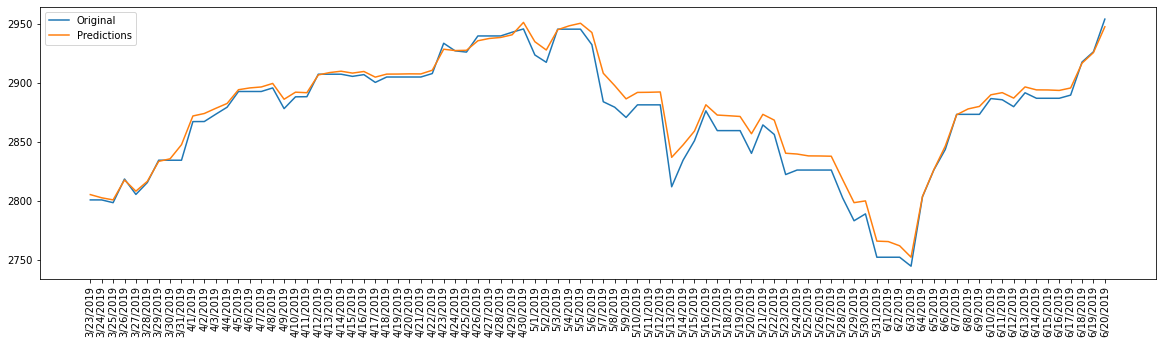

In [0]:
plt.figure(figsize=(20,5))
plt.plot(resc_y_test_new[0:90])
plt.plot(resc_pred[0:90])
plt.legend(labels = ['Original','Predictions'])
plt.xticks(ticks = np.arange(90),labels = date_list[0:90],rotation = 'vertical')
plt.show()
#plt.savefig('first100.png')

In [0]:
# plt.figure(figsize=(24,8))
# plt.plot(resc_y_test_new[0:500])
# plt.plot(resc_pred[0:500])
# plt.legend(labels = ['Original','Predictions'])
# plt.show()
# #plt.savefig('first100.png')


In [0]:
#import data and packages

#Create windowed data i.e number of days in a window
#e.g For window = 30. Predict the 30 outcome using first 30 rows.

#Run LSTM model on training data
#4 Hidden Layers with 11 units each
#Used Leaky Relu activation function with alpha=0.5(negative slope)

#Plot graph of forecast of actual test value vs the prediction value
